# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 646


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salalah
Processing Record 2 of Set 1 | phalombe
Processing Record 3 of Set 1 | ouallam
Processing Record 4 of Set 1 | luanda
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | te anau
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | belmonte
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | tena
Processing Record 17 of Set 1 | boguchany
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | pokosnoye
Processing Record 22 of Set 1 | ryotsu
Processing Record 23 o

Processing Record 38 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 39 of Set 4 | kahului
Processing Record 40 of Set 4 | temir
Processing Record 41 of Set 4 | santa marta
Processing Record 42 of Set 4 | kungurtug
Processing Record 43 of Set 4 | asfi
Processing Record 44 of Set 4 | fort frances
Processing Record 45 of Set 4 | poya
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | tyret pervaya
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | lorengau
Processing Record 0 of Set 5 | great falls
Processing Record 1 of Set 5 | maniwaki
Processing Record 2 of Set 5 | skibotn
Processing Record 3 of Set 5 | vilyuysk
Processing Record 4 of Set 5 | haines junction
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | upata
Processing Record 7 of Set 5 | vanimo
Processing Record 8 of Set 5 | tamana
Processing Record 9 of Set 5 | gornyy
Processing Record 10 of Set 5 | byron bay
Processing Record 11 of Set 5 | foso


Processing Record 26 of Set 8 | san patricio
Processing Record 27 of Set 8 | talesh
City not found. Skipping...
Processing Record 28 of Set 8 | buchanan
Processing Record 29 of Set 8 | parry sound
Processing Record 30 of Set 8 | moose factory
Processing Record 31 of Set 8 | terra nova
Processing Record 32 of Set 8 | kaplice
Processing Record 33 of Set 8 | las cruces
Processing Record 34 of Set 8 | klaksvik
Processing Record 35 of Set 8 | batelov
Processing Record 36 of Set 8 | san cristobal
Processing Record 37 of Set 8 | mehamn
Processing Record 38 of Set 8 | port blair
Processing Record 39 of Set 8 | evensk
Processing Record 40 of Set 8 | faanui
Processing Record 41 of Set 8 | conway
Processing Record 42 of Set 8 | katherine
Processing Record 43 of Set 8 | saint anthony
Processing Record 44 of Set 8 | bandiagara
Processing Record 45 of Set 8 | gusev
Processing Record 46 of Set 8 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 47 of Set 8 | ornskoldsvik
Processing R

Processing Record 12 of Set 12 | hofn
Processing Record 13 of Set 12 | bitung
Processing Record 14 of Set 12 | palana
Processing Record 15 of Set 12 | wellington
Processing Record 16 of Set 12 | santa lucia
Processing Record 17 of Set 12 | payo
Processing Record 18 of Set 12 | geresk
City not found. Skipping...
Processing Record 19 of Set 12 | asau
Processing Record 20 of Set 12 | karaton
Processing Record 21 of Set 12 | sindor
Processing Record 22 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 23 of Set 12 | abalak
Processing Record 24 of Set 12 | riyadh
Processing Record 25 of Set 12 | dudinka
Processing Record 26 of Set 12 | dimbokro
Processing Record 27 of Set 12 | karkal
Processing Record 28 of Set 12 | cefalu
Processing Record 29 of Set 12 | celestun
Processing Record 30 of Set 12 | brae
Processing Record 31 of Set 12 | abha
Processing Record 32 of Set 12 | aranos
Processing Record 33 of Set 12 | lubbock
Processing Record 34 of Set 12 | kotido
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salalah,17.0151,54.0924,25.05,57,0,1.54,OM,1675789556
1,phalombe,-15.8064,35.6507,20.27,93,100,0.71,MW,1675789817
2,ouallam,14.3188,2.0866,34.72,8,97,4.59,NE,1675789817
3,luanda,-8.8368,13.2343,29.00,65,40,6.69,AO,1675789561
4,georgetown,5.4112,100.3354,23.98,86,98,3.56,MY,1675789630


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salalah,17.0151,54.0924,25.05,57,0,1.54,OM,1675789556
1,phalombe,-15.8064,35.6507,20.27,93,100,0.71,MW,1675789817
2,ouallam,14.3188,2.0866,34.72,8,97,4.59,NE,1675789817
3,luanda,-8.8368,13.2343,29.00,65,40,6.69,AO,1675789561
4,georgetown,5.4112,100.3354,23.98,86,98,3.56,MY,1675789630


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

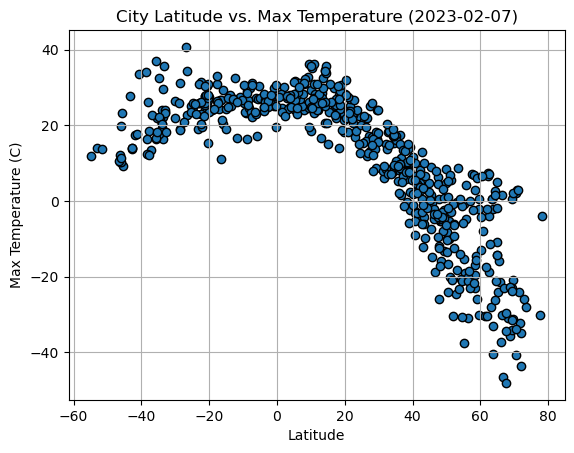

In [97]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature, edgecolors="black")
date = datetime.date(datetime.now())
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

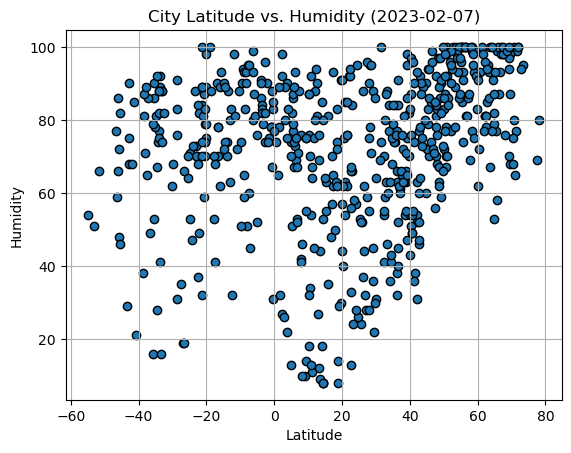

In [98]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
temperature = city_data_df["Humidity"]
plt.scatter(latitude, temperature, edgecolors="black")
date = datetime.date(datetime.now())
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

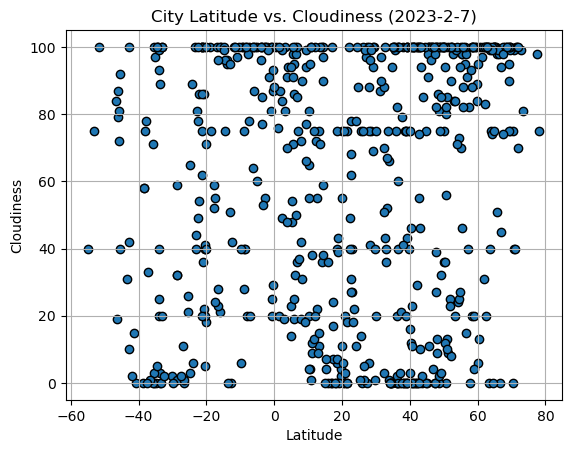

In [14]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
temperature = city_data_df["Cloudiness"]
plt.scatter(latitude, temperature, edgecolors="black")
date = datetime.date(datetime.now())
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

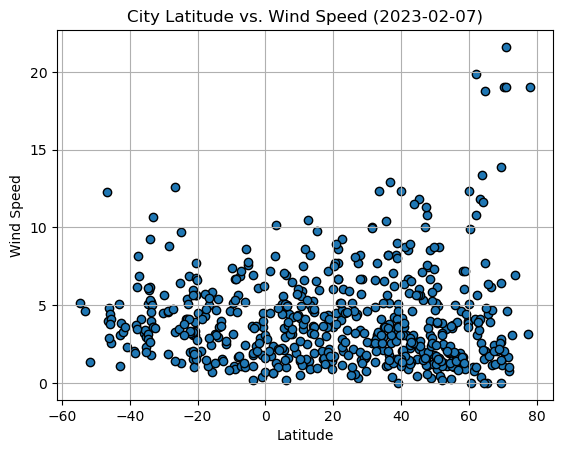

In [99]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
temperature = city_data_df["Wind Speed"]
plt.scatter(latitude, temperature, edgecolors="black")
date = datetime.date(datetime.now())
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [138]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_values, y_label, hemisphere, text_coordinates):
    
    # Perform a linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    date = datetime.date(datetime.now())
    plt.title(f"{y_label} v. Latitude - {hemisphere} Hemisphere ({date})",fontsize = 10)
    
    plt.show()
    print(f"The r-value is: {r_value**2}")

In [139]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salalah,17.0151,54.0924,25.05,57,0,1.54,OM,1675789556
2,ouallam,14.3188,2.0866,34.72,8,97,4.59,NE,1675789817
4,georgetown,5.4112,100.3354,23.98,86,98,3.56,MY,1675789630
7,kapaa,22.0752,-159.3190,24.18,92,100,5.14,US,1675789494
9,nikolskoye,59.7035,30.7861,-2.06,92,89,4.00,RU,1675789637


In [140]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,phalombe,-15.8064,35.6507,20.27,93,100,0.71,MW,1675789817
3,luanda,-8.8368,13.2343,29.00,65,40,6.69,AO,1675789561
5,atuona,-9.8000,-139.0333,25.87,74,6,7.39,PF,1675789389
6,te anau,-45.4167,167.7167,9.32,82,92,2.56,NZ,1675789564
8,new norfolk,-42.7826,147.0587,13.72,90,42,1.09,AU,1675789497


###  Temperature vs. Latitude Linear Regression Plot

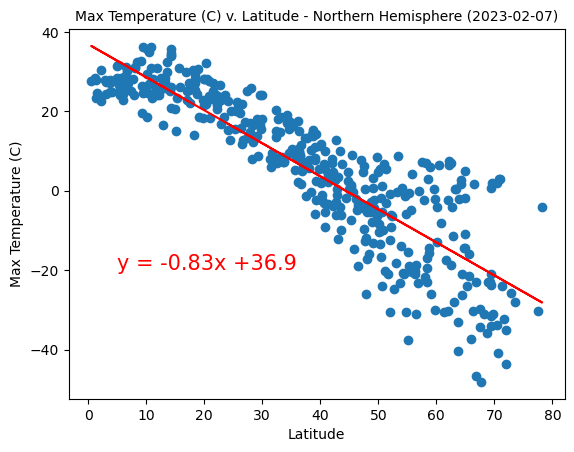

The r-value is: 0.7685544240177574


In [141]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
y_label = "Max Temperature (C)"
hemisphere = "Northern"

plot_linear_regression(x_values, y_values, y_label, hemisphere, (5,-20))

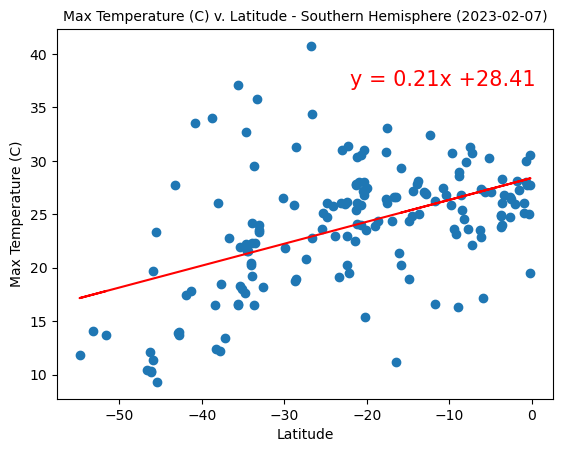

The r-value is: 0.23593328290855622


In [142]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
y_label = "Max Temperature (C)"
hemisphere = "Southern"

plot_linear_regression(x_values, y_values, y_label, hemisphere, (-22,37))

**Discussion about the linear relationship:** There is an inverse correlation between temperature and latitude for the Southern versus Northern hemispheres. For the Southern Hemisphere, as latitude increases towards the Equator temperatures tend to increase. However, with an r-value of only 0.24, this postive correlation is a loose relationship. On the other hand, for the Northern Hemisphere, as latitude increases away from the Equator temeratures reliably decrease. The Northern Hemisphere displays a fairly strong negative correlation with an r-value of 0.77 .

### Humidity vs. Latitude Linear Regression Plot

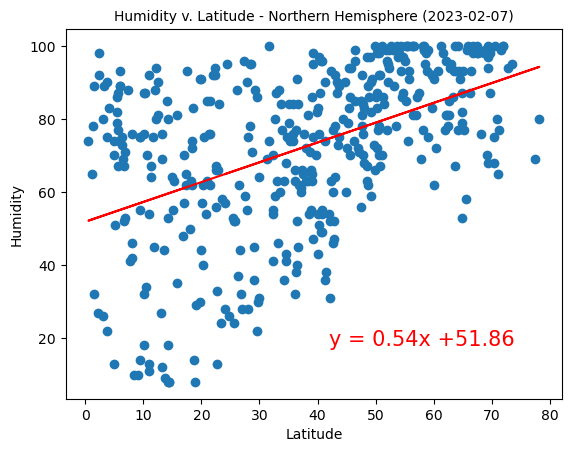

The r-value is: 0.2246374511594775


In [143]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_label = "Humidity"
hemisphere = "Northern"

plot_linear_regression(x_values, y_values, y_label, hemisphere, (42,18))

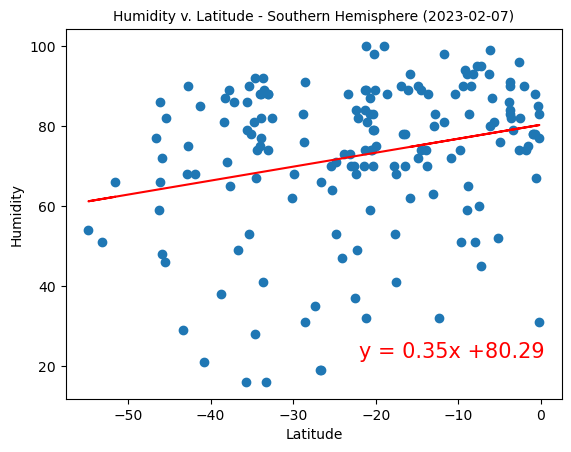

The r-value is: 0.06455965655209628


In [144]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_label = "Humidity"
hemisphere = "Southern"

plot_linear_regression(x_values, y_values, y_label, hemisphere, (-22,22))

**Discussion about the linear relationship:** Although there does seem to be a relationship between latitude and temperature for both hemispheres, the positive correlation is weak; with it being virtually nonexistent for the South.

### Cloudiness vs. Latitude Linear Regression Plot

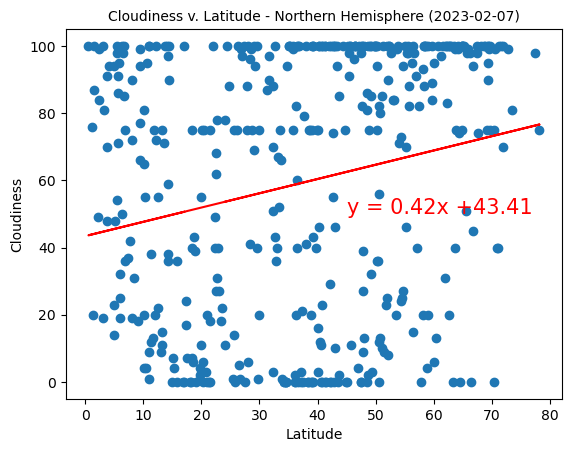

The r-value is: 0.047058102761048375


In [145]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
hemisphere = "Northern"

plot_linear_regression(x_values, y_values, y_label, hemisphere, (45,50))

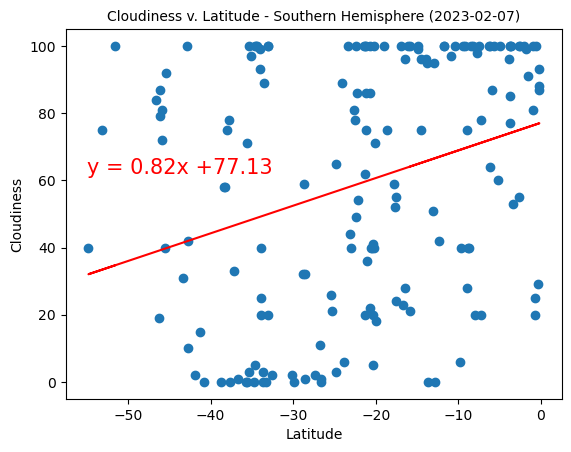

The r-value is: 0.0923373006716391


In [146]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
hemisphere = "Southern"

plot_linear_regression(x_values, y_values, y_label, hemisphere, (-55,62))

**Discussion about the linear relationship:** There is virtually no relationship between latitude and cloudiness for either hemishpere.

### Wind Speed vs. Latitude Linear Regression Plot

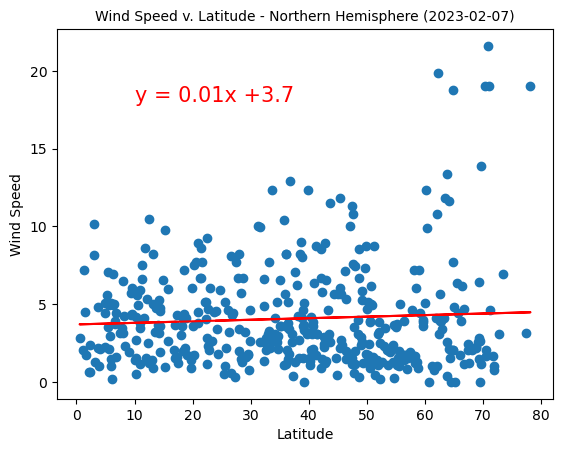

The r-value is: 0.0036011053635326903


In [147]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
hemisphere = "Northern"

plot_linear_regression(x_values, y_values, y_label, hemisphere, (10,18))

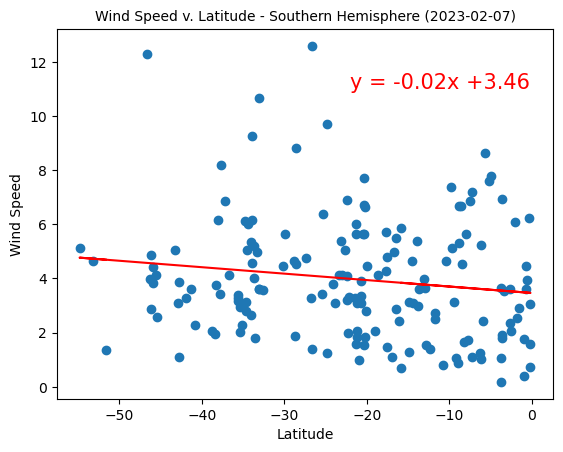

The r-value is: 0.02131205495315494


In [148]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
hemisphere = "Southern"

plot_linear_regression(x_values, y_values, y_label, hemisphere, (-22,11))

**Discussion about the linear relationship:** There is virtually no relationship between latitude and wind speed for either hemishpere.